In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import shap
import matplotlib.pyplot as plt
import joblib

c:\Users\frmar\OneDrive\Desktop\GitHub\CNN-explainability-Earthquakes\CNN_EQML\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Load the dataset
file_path = r"C:\Users\frmar\OneDrive\Desktop\EQML Project\data_preprocessed\data_preprocessed\metadata_with_features.csv"
df = pd.read_csv(file_path)

# Specify target variable and features
target_column = 'source_magnitude'  # Replace with your target column name
features = df.drop(columns=[target_column])  # Drop the target column to create feature set
X = features.select_dtypes(include=['float64', 'int64'])  # Use only numerical features
y = df[target_column]

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [3]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.01944151409728777
R² Score: 0.8932511339046686


In [4]:
# Save the model to a file
joblib.dump(model, 'trained_models/random_forest_model.pkl')
print("Model saved successfully.")

Model saved successfully.


In [3]:
# Load the model from the file
model = joblib.load('trained_models/random_forest_model.pkl')

# Verify the loaded model works
y_pred_loaded = model.predict(X_test)
print("Model loaded successfully.")

Model loaded successfully.


Mean Absolute Error (MAE): 0.1007
Mean Squared Error (MSE): 0.0194
Root Mean Squared Error (RMSE): 0.1394
R² Score: 0.8933
Explained Variance: 0.8934


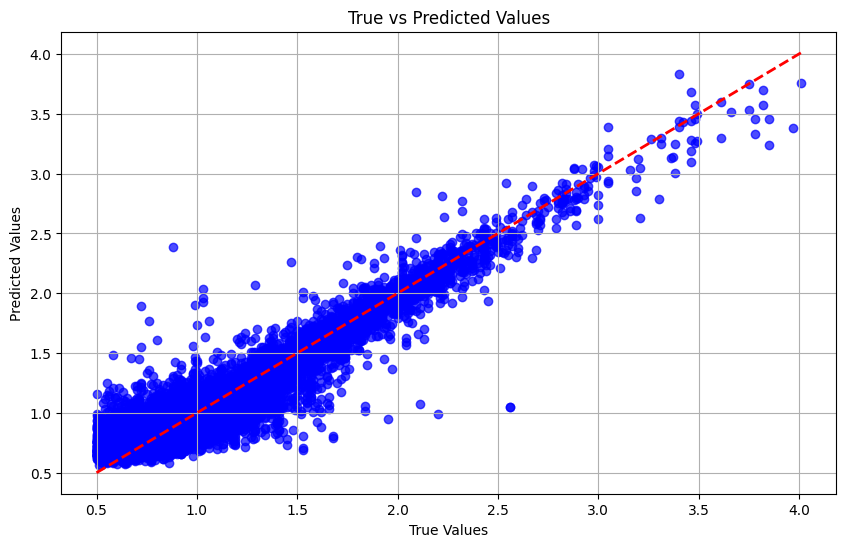

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared
explained_variance = explained_variance_score(y_test, y_pred)  # Explained Variance

# Display metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Explained Variance: {explained_variance:.4f}")

# Plot: True vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # y=x line
plt.title("True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()



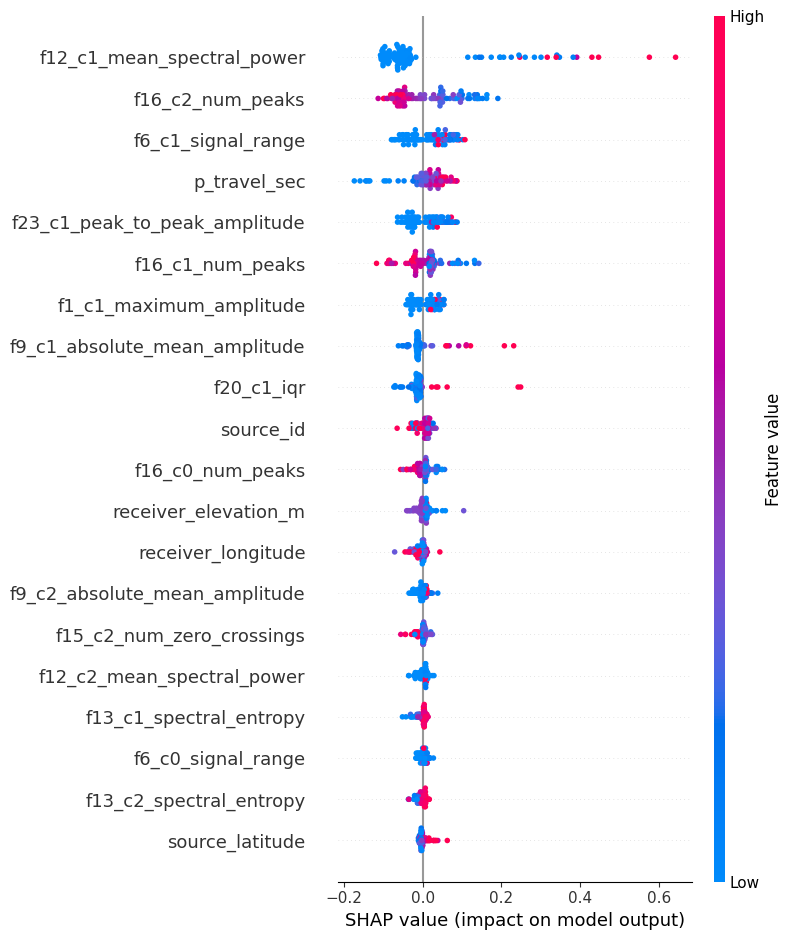

In [6]:
# Take a small random sample of the test data
X_test_sample = X_test.sample(n=100, random_state=42)

# Use SHAP TreeExplainer for Random Forest
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_sample)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_test_sample)


In [2]:
# Load the dataset
file_path = r"C:\Users\frmar\OneDrive\Desktop\EQML Project\data_preprocessed\data_preprocessed\metadata_with_features.csv"
df = pd.read_csv(file_path)

# Specify target variable and features
target_column = 'source_magnitude'  
features_to_remove = [
    "trace_name",
    "trace_start_time",
    "network_code",
    "receiver_name",
    "receiver_type",
    "receiver_elevation_m",
    "receiver_latitude",
    "receiver_longitude",
    "source_id",
    "source_magnitude_type",
    ]


features = df.drop(columns=[target_column] + features_to_remove)  # Drop the target column to create feature set
X = features.select_dtypes(include=['float64', 'int64'])  # Use only numerical features
y = df[target_column]

# Handle missing values (if any)
X.fillna(X.mean(), inplace=True)
y.fillna(y.mean(), inplace=True)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
# Train a Random Forest Regressor
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

Mean Squared Error: 0.02123289561261091
R² Score: 0.883415071520435


In [4]:
joblib.dump(model, 'trained_models/random_forest_model_v2.pkl')

['trained_models/random_forest_model_v2.pkl']

In [5]:
model = joblib.load('trained_models/random_forest_model_v2.pkl')

Mean Absolute Error (MAE): 0.1052
Mean Squared Error (MSE): 0.0212
Root Mean Squared Error (RMSE): 0.1457
R² Score: 0.8834
Explained Variance: 0.8835


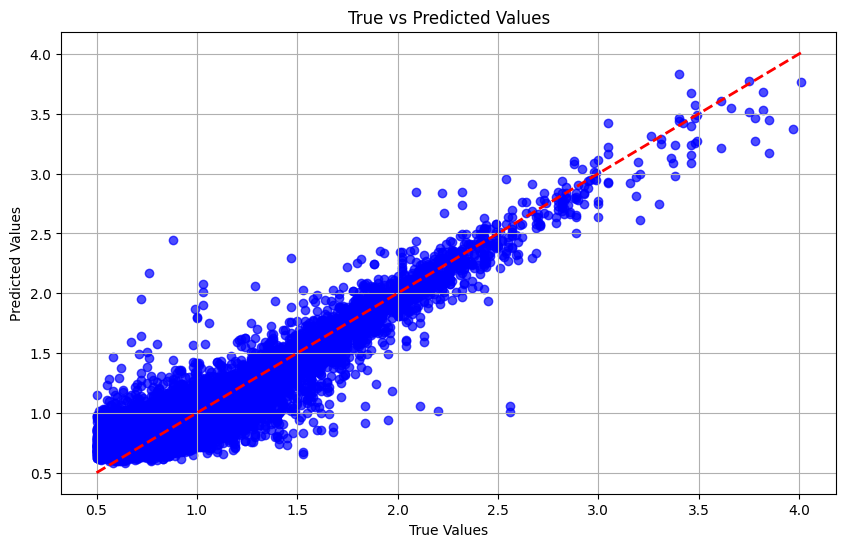

In [6]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score
import numpy as np

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Root Mean Squared Error
r2 = r2_score(y_test, y_pred)  # R-squared
explained_variance = explained_variance_score(y_test, y_pred)  # Explained Variance

# Display metrics
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R² Score: {r2:.4f}")
print(f"Explained Variance: {explained_variance:.4f}")

# Plot: True vs Predicted
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', linewidth=2)  # y=x line
plt.title("True vs Predicted Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.grid(True)
plt.show()


In [7]:
# Take a small random sample of the test data
X_test_sample = X_test.sample(n=100, random_state=42)

# Use SHAP TreeExplainer for Random Forest
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_sample)

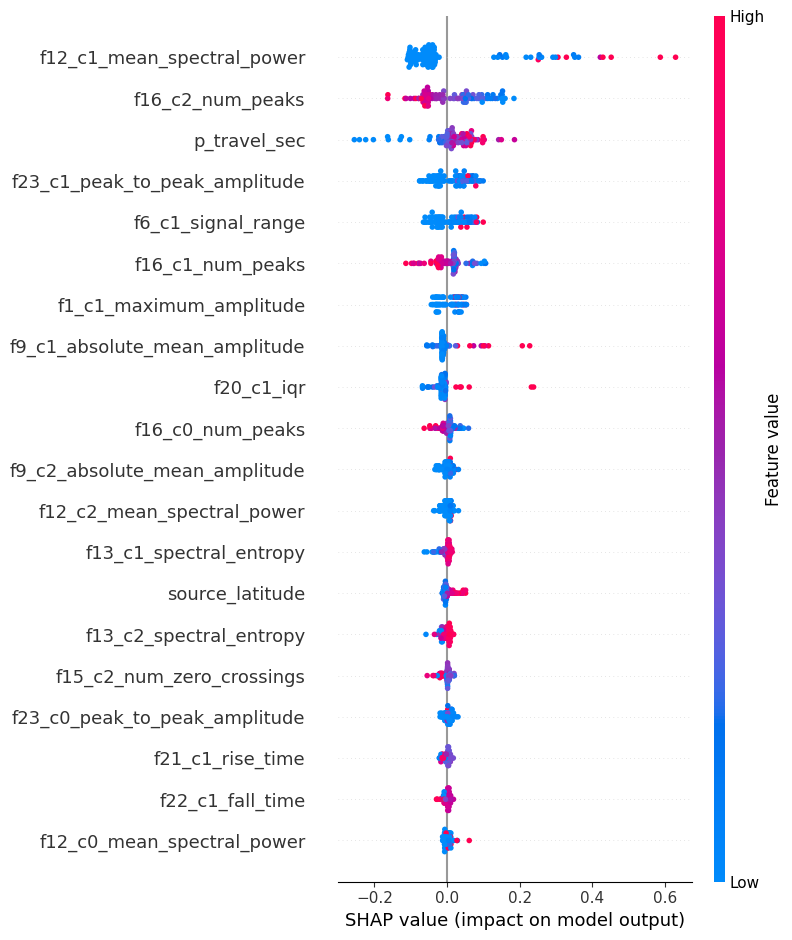

In [8]:
# Plot the SHAP summary
shap.summary_plot(shap_values, X_test_sample)

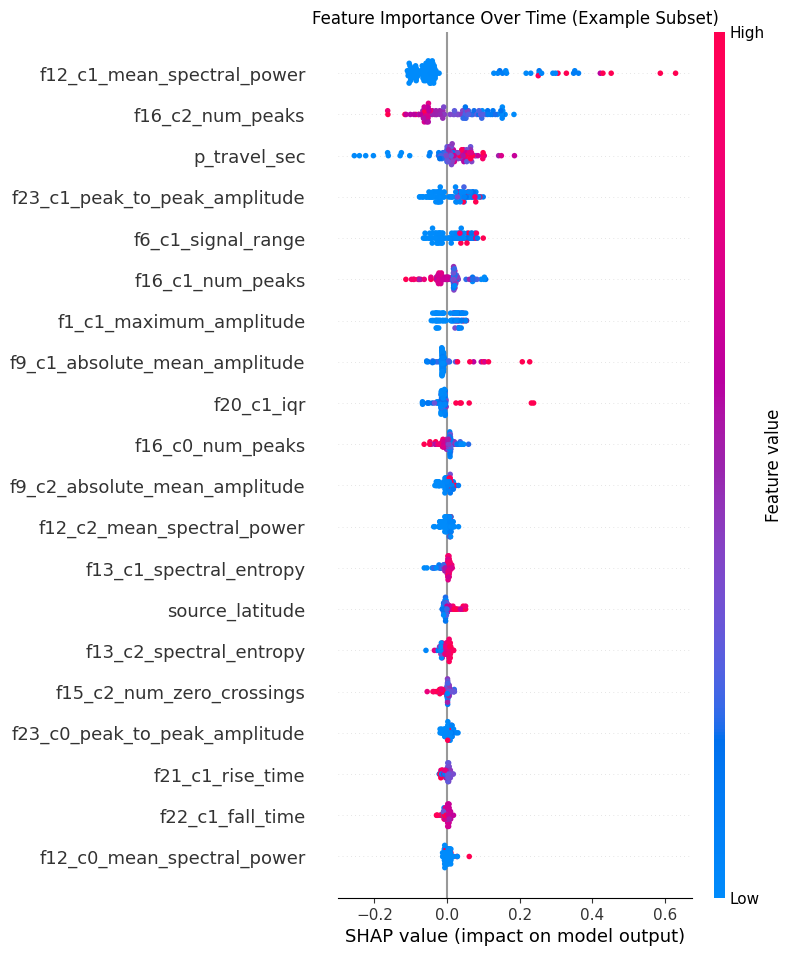

In [9]:
# 1. Feature Importance Over Time
# Example: Track feature importance across subsets of the dataset.
shap.summary_plot(shap_values, X_test_sample, show=False)
plt.title("Feature Importance Over Time (Example Subset)")
plt.show()

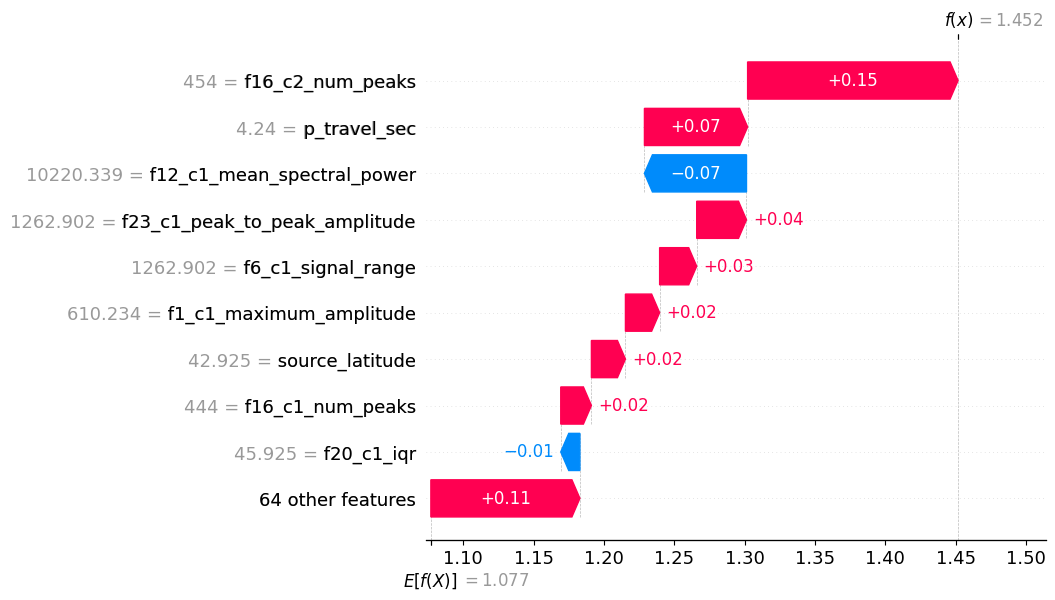

In [10]:
# 2. Explaining Individual Predictions
# Extract SHAP values for the single data point
shap_values_for_point = explainer(X_test.iloc[0:1])  # Slice to maintain DataFrame structure

# Generate the waterfall plot for the single explanation
shap.waterfall_plot(shap_values_for_point[0])


C:\Users\frmar\AppData\Local\Temp\ipykernel_9476\2084547374.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  high_group = X_test_sample[y_test > y_test.median()]
C:\Users\frmar\AppData\Local\Temp\ipykernel_9476\2084547374.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  low_group = X_test_sample[y_test <= y_test.median()]


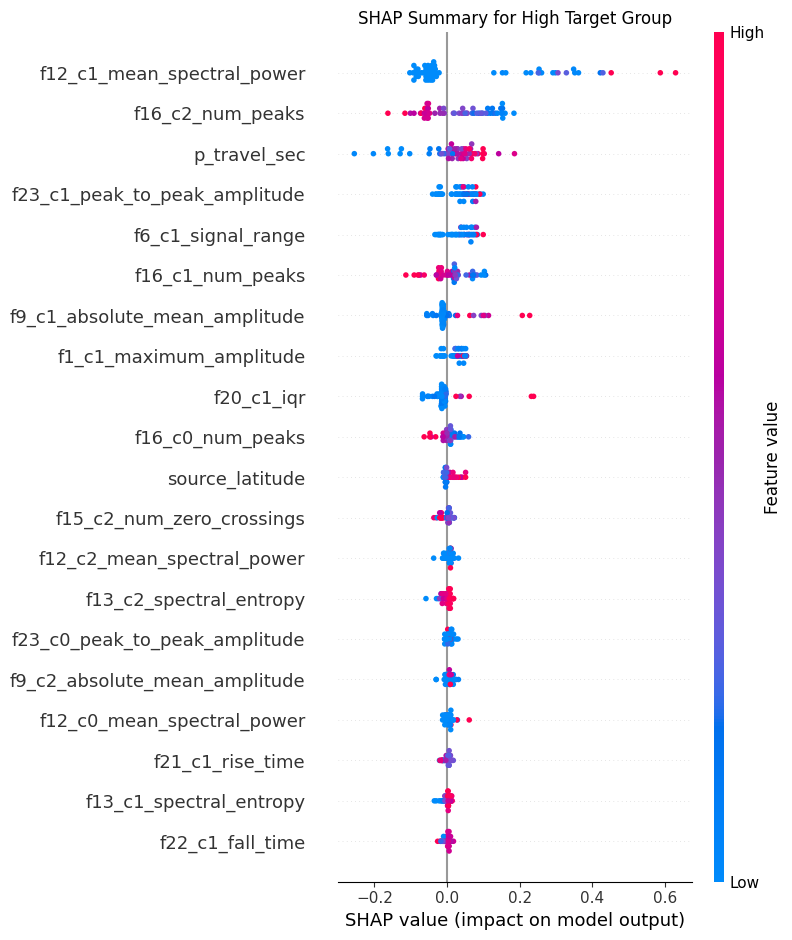

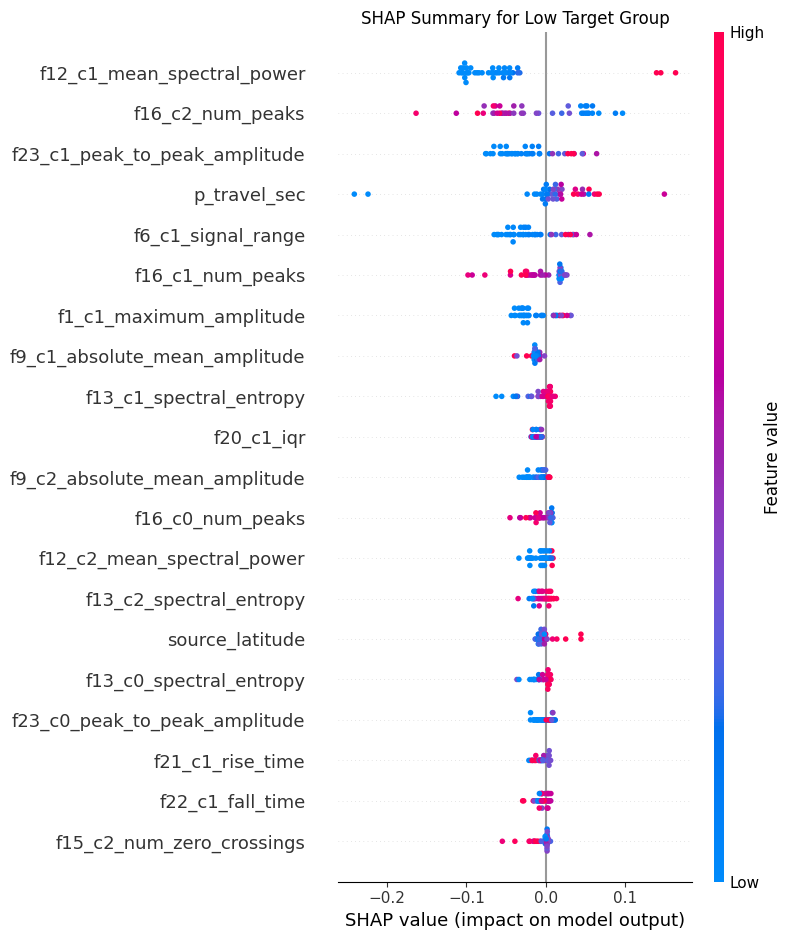

In [11]:
# 4. Group-Specific Interpretations
# Example: Compare SHAP values for two groups (e.g., high vs. low target).
high_group = X_test_sample[y_test > y_test.median()]
low_group = X_test_sample[y_test <= y_test.median()]
shap_high = explainer(high_group)
shap_low = explainer(low_group)

plt.title("SHAP Summary for High Target Group")
shap.summary_plot(shap_high, high_group, show=False)
plt.show()

plt.title("SHAP Summary for Low Target Group")
shap.summary_plot(shap_low, low_group, show=False)
plt.show()

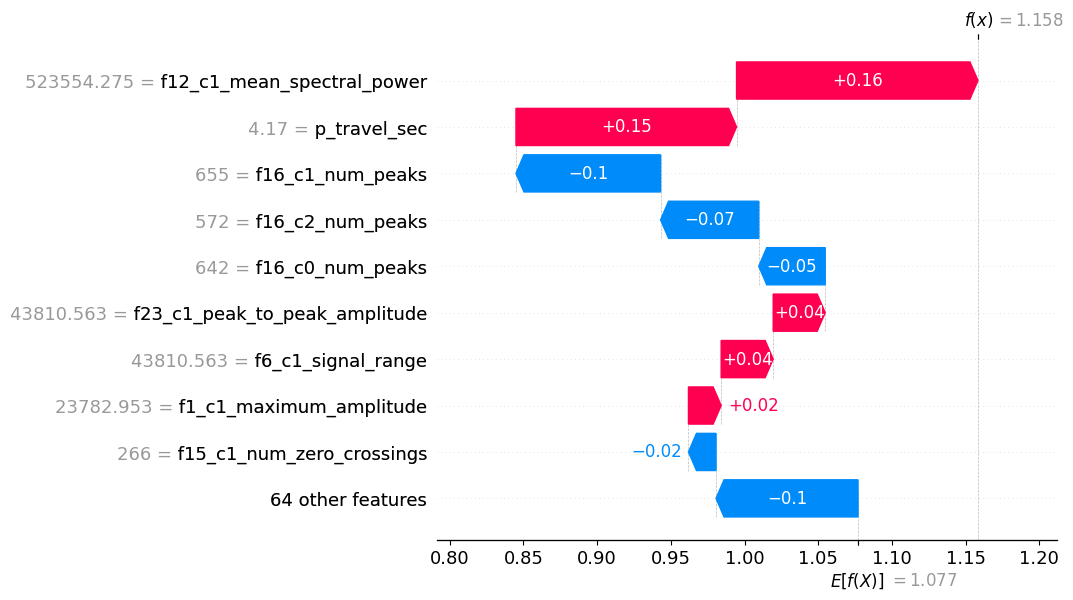

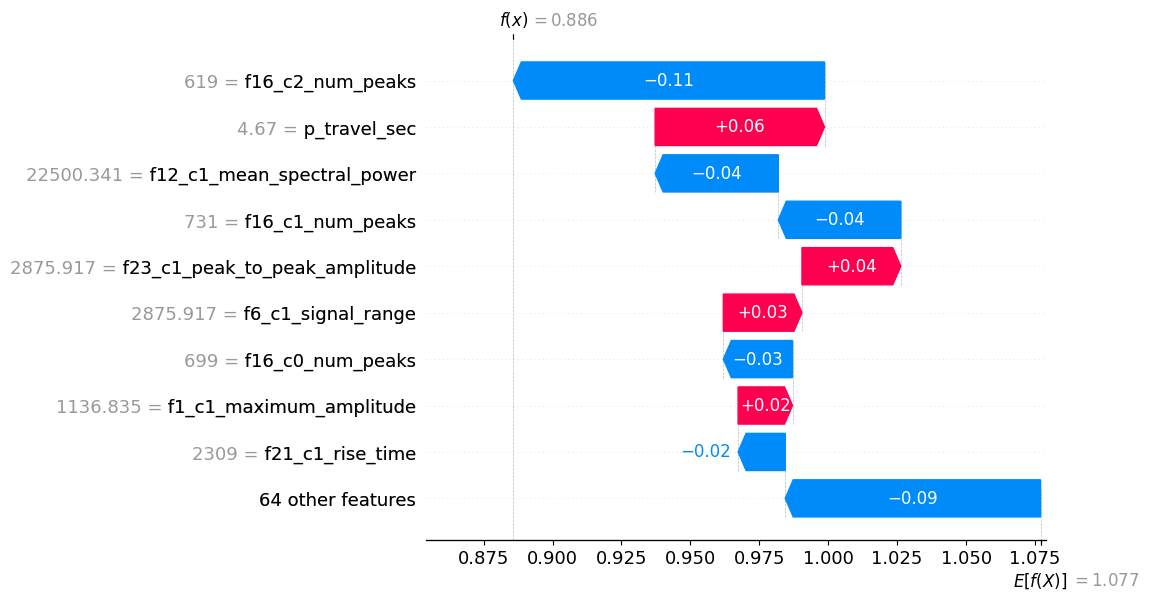

In [12]:
# 5. Contrastive Explanations
# Compare two specific predictions
shap_values_point1 = explainer(X_test_sample.iloc[0:1])
shap_values_point2 = explainer(X_test_sample.iloc[1:2])

# Generate waterfall plots
shap.waterfall_plot(shap_values_point1[0])
shap.waterfall_plot(shap_values_point2[0])


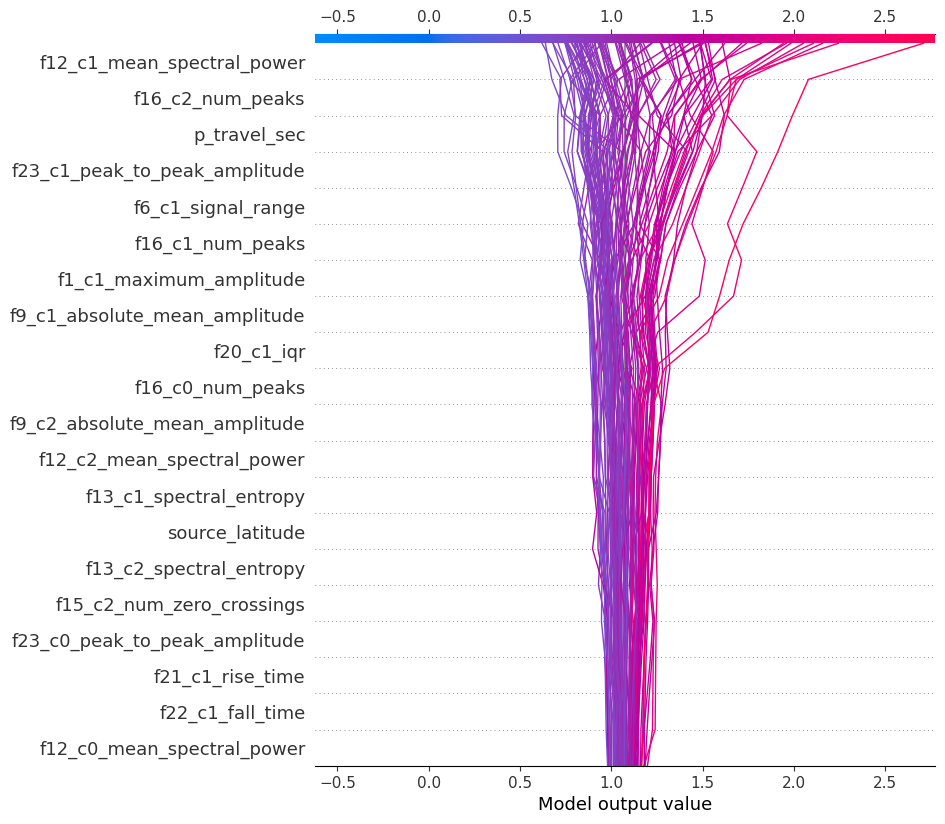

In [13]:
# 6. Anomaly Detection
# Generate SHAP values for the test dataset
shap_values = explainer(X_test_sample)

# Extract the SHAP values as a NumPy array
shap_values_array = shap_values.values  # Extract the array of SHAP values

# Use decision_plot with the extracted values
shap.decision_plot(explainer.expected_value, shap_values_array, X_test_sample)


In [14]:
# 7. Explainability in Hyperparameter Tuning
# (Demonstrated by running SHAP analysis across different hyperparameter configurations.)
# Example: Use SHAP after retraining the model with different parameters.
model_alt = RandomForestRegressor(n_estimators=50, random_state=42)
model_alt.fit(X_train, y_train)

joblib.dump(model_alt, 'model_alt_random_forest.pkl')
print("Model saved as 'model_alt_random_forest.pkl'")

Model saved as 'model_alt_random_forest.pkl'


In [15]:
joblib.dump(model_alt, 'trained_models/random_forest_model_alt.pkl')

['trained_models/random_forest_model_alt.pkl']

In [16]:
model_alt = joblib.load('trained_models/random_forest_model_alt.pkl')

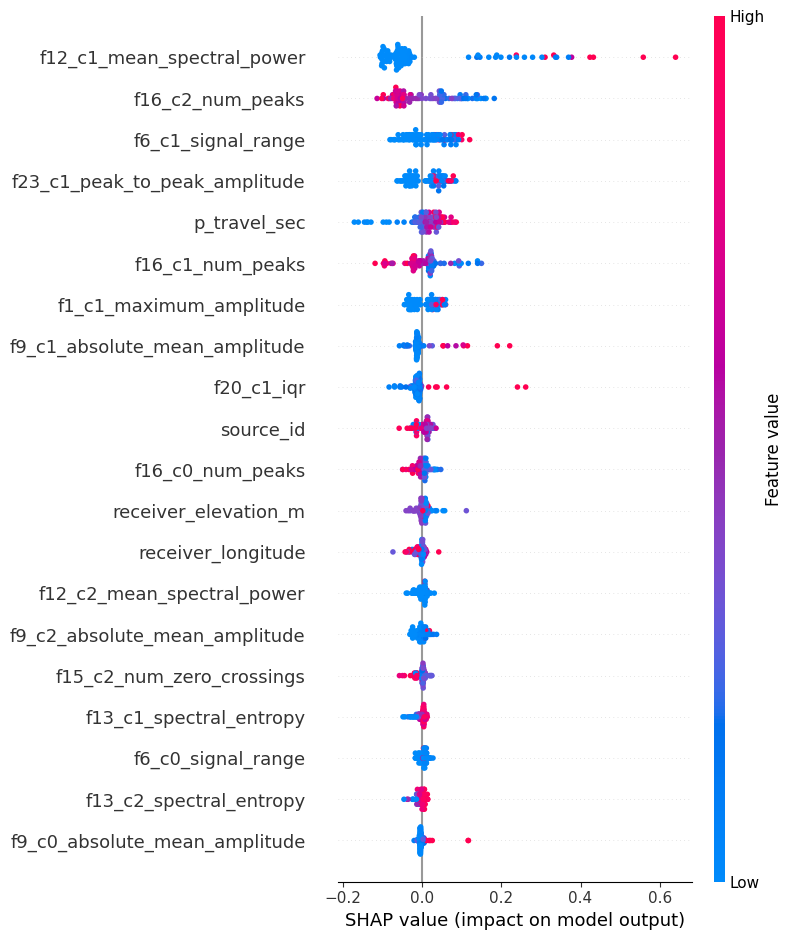

In [4]:
# Take a small random sample of the test data
X_test_sample = X_test.sample(n=100, random_state=42)

# Use SHAP TreeExplainer for Random Forest
explainer = shap.TreeExplainer(model_alt)
shap_values = explainer.shap_values(X_test_sample)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_test_sample)

<Axes: xlabel='external_factor', ylabel='mean_SHAP'>

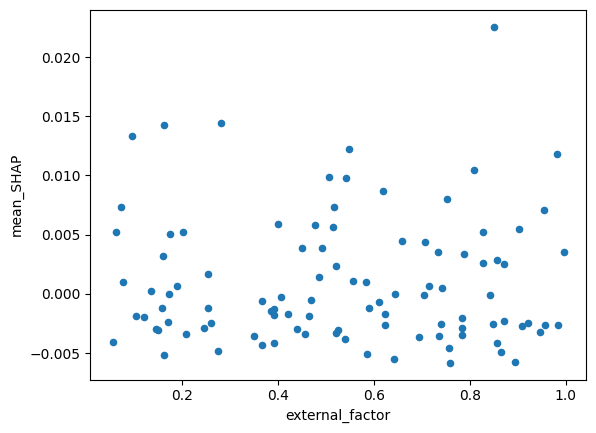

In [10]:
# 9. Correlation with External Factors
# Extract the SHAP values from the Explanation object
shap_values_array = shap_values.values  # Shape: (100, 77)

# Calculate the mean SHAP values across features for each sample
mean_shap_values = shap_values_array.mean(axis=1)  # Shape: (100,)

# Create a DataFrame using the calculated mean SHAP values
shap_summary = pd.DataFrame({"mean_SHAP": mean_shap_values})

# Add the external factor for comparison
external_factor = np.random.random(size=len(mean_shap_values))  # Placeholder for external data
shap_summary["external_factor"] = external_factor

# Scatter plot to compare SHAP values with the external factor
shap_summary.plot.scatter(x="external_factor", y="mean_SHAP")



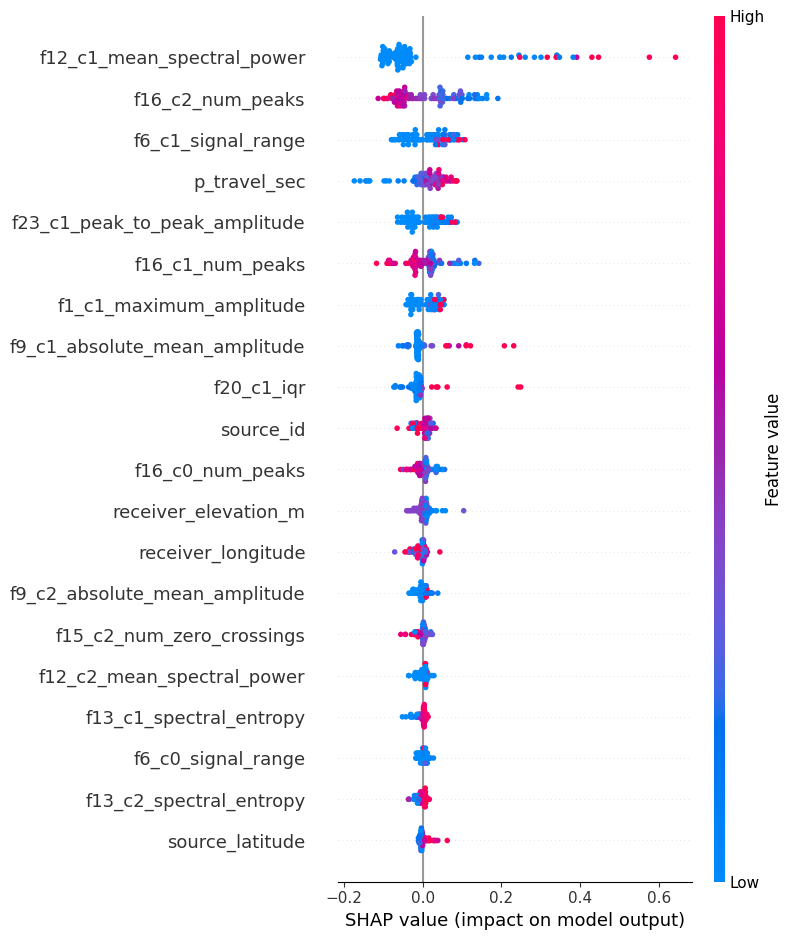

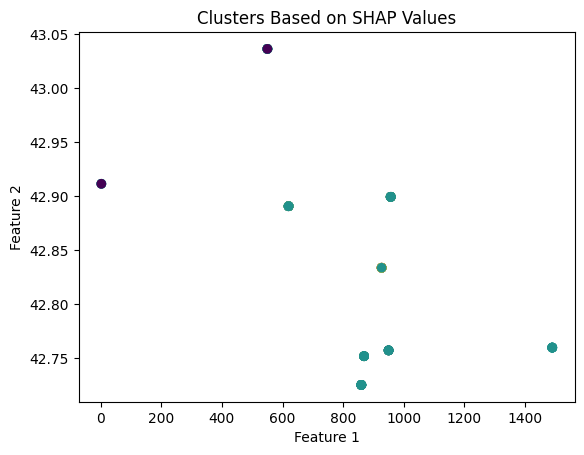

In [11]:
# Take a small random sample of the test data
X_test_sample = X_test.sample(n=100, random_state=42)

# Use SHAP TreeExplainer for Random Forest
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test_sample)

# Plot the SHAP summary
shap.summary_plot(shap_values, X_test_sample)

from sklearn.cluster import KMeans
# Combine SHAP values if model has multiple outputs (e.g., classification)
if isinstance(shap_values, list):  # If SHAP values are a list (e.g., multi-class)
    shap_combined = np.sum(shap_values, axis=0)  # Combine across outputs
else:
    shap_combined = shap_values  # Use as is for single output models

# Reshape and apply KMeans
clusters = KMeans(n_clusters=3, random_state=42).fit_predict(shap_combined)

# Plot the clusters
plt.scatter(X_test_sample.iloc[:, 0], X_test_sample.iloc[:, 1], c=clusters, cmap="viridis")
plt.title("Clusters Based on SHAP Values")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()
